# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
# printing hea data of datasaet
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# checking null data
round((100*df.isnull().sum())/len(df),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

## removing columns that have 100% empty data


In [5]:
df=df.loc[:,(round((100*df.isnull().sum())/len(df),2) < 30.00)]
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
#remove rows having any column empty
df.dropna(axis = 0,inplace = True)
df.shape

(36431, 53)

## Removing columns from dataset which have only single value in whole dataset

In [7]:
a = df.columns
a = a.tolist()

In [8]:
def uni_value(a,df):
    b = []
    for i in a:
        if len(df[i].unique()) == 1:
            b.append(i)
    return b

In [9]:
b = uni_value(a,df)
df.drop(b,axis =1,inplace = True)

In [10]:
# print head data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


## dropping current loan status because they do not give any past record 

In [11]:
loan = ['Charged Off','Fully Paid']
loans_df = df[df.loan_status.apply(lambda x : x in loan)]

In [12]:
loans_df.columns 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## extracting those columns from the main dataframe that can have effect on our output

In [13]:
loans_df = loans_df[['loan_amnt','term', 'int_rate','grade','emp_title','emp_length','home_ownership','annual_inc','loan_status', 'purpose','dti','issue_d','pub_rec_bankruptcies','last_pymnt_d','addr_state']]

In [14]:
loans_df.reset_index(inplace= True)

In [15]:
loans_df.drop('index',inplace = True,axis = 1)

In [16]:
#head data of our working dataset
loans_df.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,issue_d,pub_rec_bankruptcies,last_pymnt_d,addr_state
0,2500,60 months,15.27%,C,Ryder,< 1 year,RENT,30000.0,Charged Off,car,1.00,Dec-11,0.0,Apr-13,GA
1,10000,36 months,13.49%,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Fully Paid,other,20.00,Dec-11,0.0,Jan-15,CA
2,5000,36 months,7.90%,A,Veolia Transportaton,3 years,RENT,36000.0,Fully Paid,wedding,11.20,Dec-11,0.0,Jan-15,AZ
3,7000,60 months,15.96%,C,Southern Star Photography,8 years,RENT,47004.0,Fully Paid,debt_consolidation,23.51,Dec-11,0.0,May-16,NC
4,3000,36 months,18.64%,E,MKC Accounting,9 years,RENT,48000.0,Fully Paid,car,5.35,Dec-11,0.0,Jan-15,CA


In [17]:
#deriving year of issue o loan and year of last payment date of loan
loans_df['issue_year'] = loans_df['issue_d'].apply(lambda x : x.split('-')[1])
loans_df['last payment year'] = loans_df['last_pymnt_d'].apply(lambda x : x.split('-')[1])
loans_df['issue_month'] = loans_df['issue_d'].apply(lambda x : x.split('-')[0])
loans_df['last payment month'] = loans_df['last_pymnt_d'].apply(lambda x : x.split('-')[0])

In [18]:
loans_df.head()

,loan_amnt,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,issue_d,pub_rec_bankruptcies,last_pymnt_d,addr_state,issue_year,last payment year,issue_month,last payment month
0,2500,60 months,15.27%,C,Ryder,< 1 year,RENT,30000.0,Charged Off,car,1.00,Dec-11,0.0,Apr-13,GA,11,13,Dec,Apr
1,10000,36 months,13.49%,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Fully Paid,other,20.00,Dec-11,0.0,Jan-15,CA,11,15,Dec,Jan
2,5000,36 months,7.90%,A,Veolia Transportaton,3 years,RENT,36000.0,Fully Paid,wedding,11.20,Dec-11,0.0,Jan-15,AZ,11,15,Dec,Jan
3,7000,60 months,15.96%,C,Southern Star Photography,8 years,RENT,47004.0,Fully Paid,debt_consolidation,23.51,Dec-11,0.0,May-16,NC,11,16,Dec,May
4,3000,36 months,18.64%,E,MKC Accounting,9 years,RENT,48000.0,Fully Paid,car,5.35,Dec-11,0.0,Jan-15,CA,11,15,Dec,Jan


# LET US FIRST CHECK WHEN AND WHERE MOST LOANS ARE TAKEN

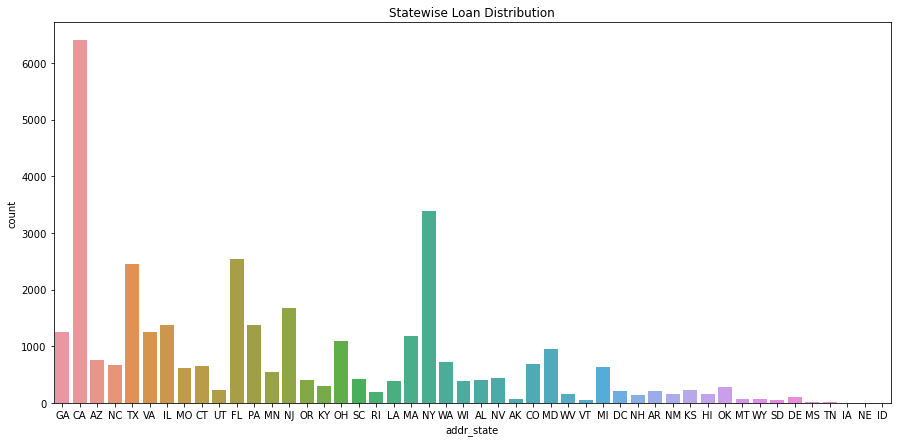

In [19]:
plt.figure(figsize = (15,7))
plt.title('Statewise Loan Distribution')
sb.countplot(loans_df['addr_state'])


In [20]:
loan_charged_off = loans_df[loans_df['loan_status'].apply(lambda x : x == 'Charged Off')]
loan_fully_paid = loans_df[loans_df['loan_status'].apply(lambda x : x == 'Fully Paid')]

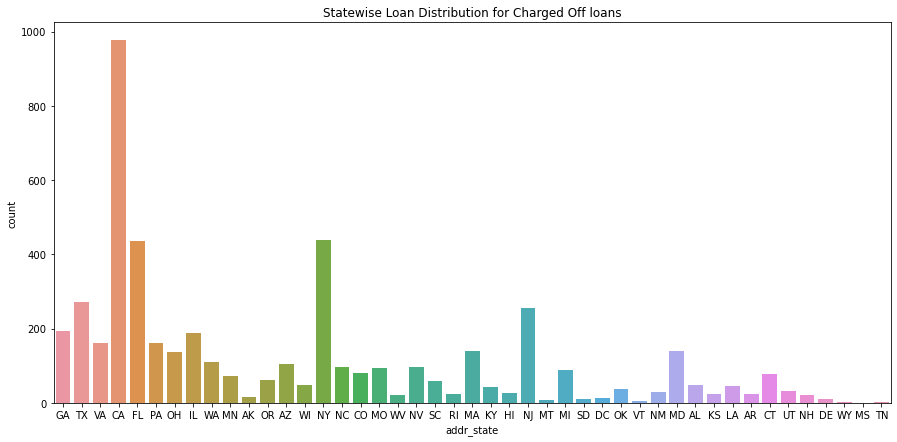

In [21]:
plt.figure(figsize = (15,7))
plt.title('Statewise Loan Distribution for Charged Off loans')
sb.countplot(loan_charged_off['addr_state'])

## FROM THE ABOVE PLOT IT CAN BE SEEN THAT THE CHARGED OFF LOANS BELONG TO THE FOLLOWING STATES NAMELY GA,TX,CA,NY,NJ etc

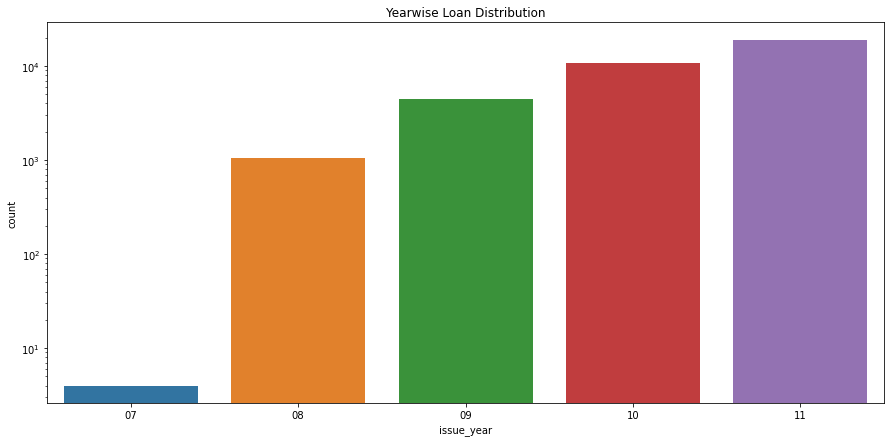

In [22]:
plt.figure(figsize = (15,7))
plt.yscale('log')
plt.title('Yearwise Loan Distribution')
sb.countplot(loans_df['issue_year'])

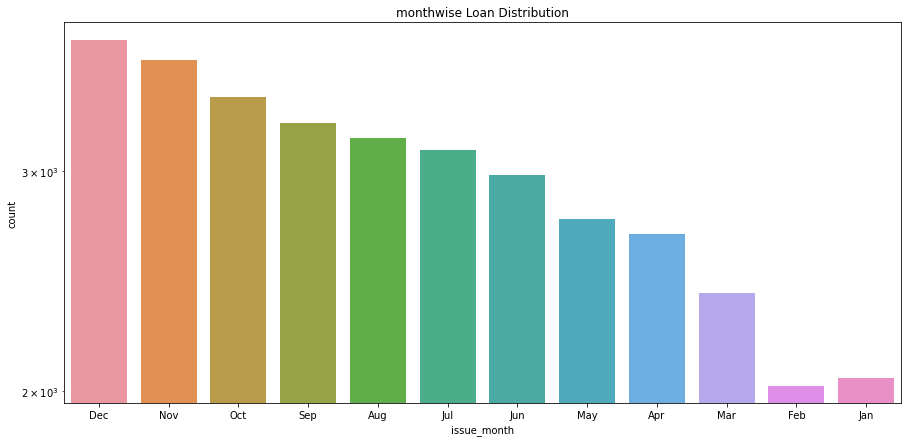

In [23]:
plt.figure(figsize = (15,7))
plt.yscale('log')
plt.title('monthwise Loan Distribution')
sb.countplot(loans_df['issue_month'])

## it is bserved that rare loans are taken in the start of the year and the graph of loan application increases with the end of year

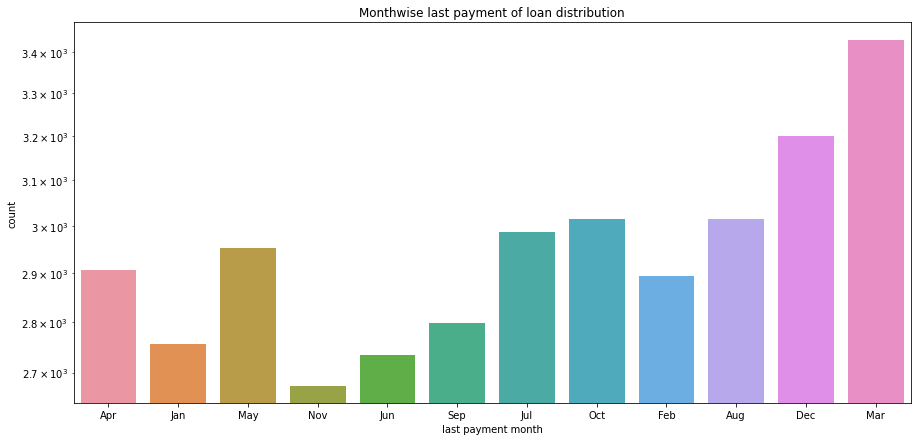

In [24]:
plt.figure(figsize = (15,7))
plt.yscale('log')
plt.title('Monthwise last payment of loan distribution')
sb.countplot(loans_df['last payment month'])

## it is observed that most of the loans are last paid iin the month of march let us check the same for CHARGED OFF loans

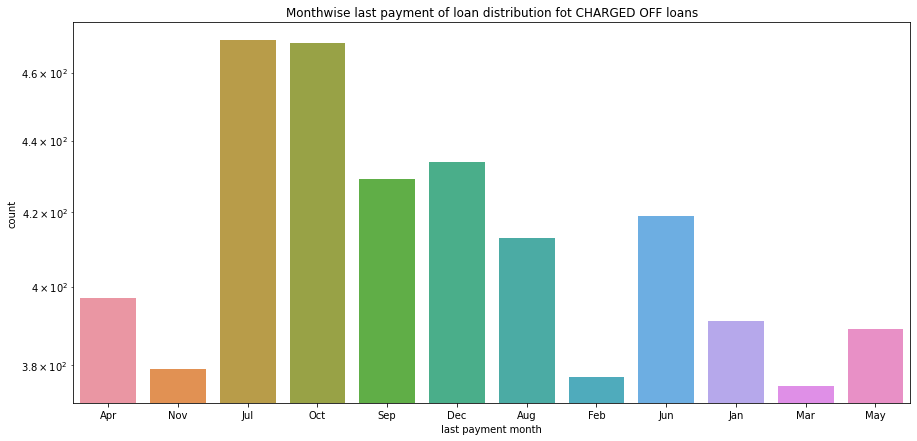

In [25]:
plt.figure(figsize = (15,7))
plt.yscale('log')
plt.title('Monthwise last payment of loan distribution fot CHARGED OFF loans')
sb.countplot(loan_charged_off['last payment month'])

## in case of CHARGED OFF loans the last installments were paid in the middle of the year to the end of the year thus it can be seen that Fully paid loans installment is usually also paid in the month of march

# let us have a look on what kind of people take loans

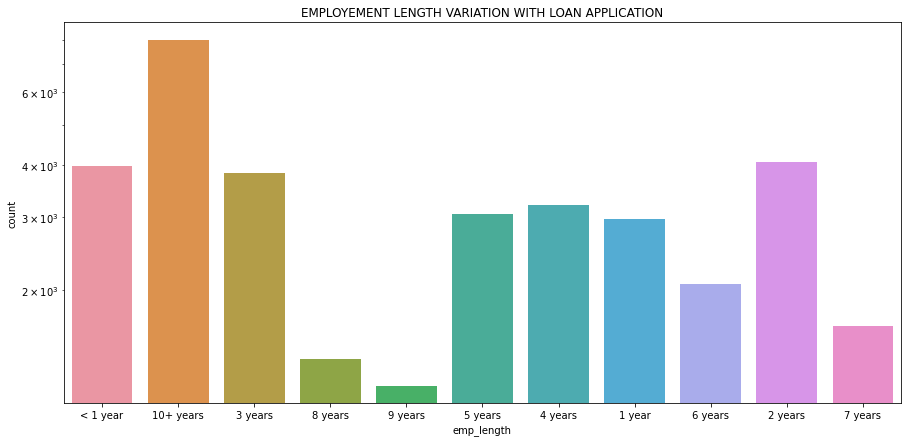

In [26]:
plt.figure(figsize = (15,7))
plt.yscale('log')
plt.title('EMPLOYEMENT LENGTH VARIATION WITH LOAN APPLICATION')
sb.countplot(loans_df['emp_length'])

## PEOPLE WITH 10+ YEARS OF EXPERIENCE IN ANY JOB TAKE MOST LOANS FOLLOWED BY PEOPLE WITH 0 to 5 YEARS EXPERIENCE

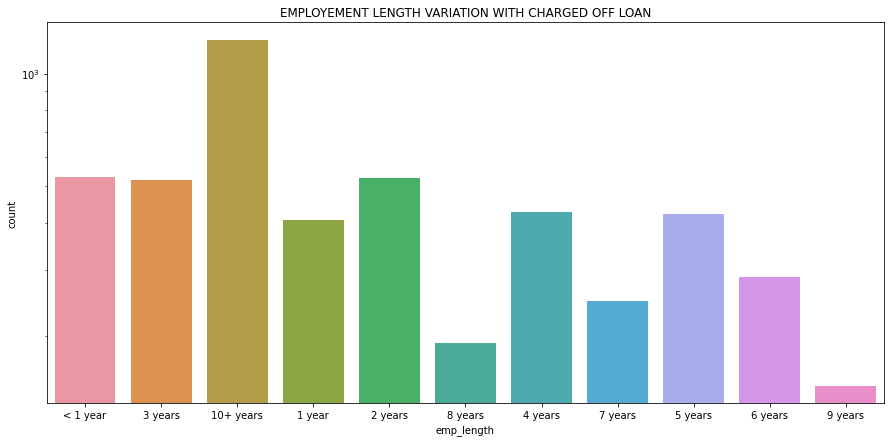

In [27]:
plt.figure(figsize = (15,7))
plt.yscale('log')
plt.title('EMPLOYEMENT LENGTH VARIATION WITH CHARGED OFF LOAN')
sb.countplot(loan_charged_off['emp_length'])

## AGAIN PEOPLE WITH 10+ YEARS OF EXPERIENCE ARE UNABLE TO REPAY LOANS

In [28]:
title = loans_df['emp_title'].value_counts()

In [29]:
title = title.to_dict()

In [30]:
occupation = pd.DataFrame.from_dict(title,orient = 'index')

In [31]:
occupation.reset_index(inplace = True)

In [32]:
occupation.sort_values(by = 0,ascending = False,inplace = True)

In [33]:
occupation = occupation.head(15)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'OCCUPATION')]

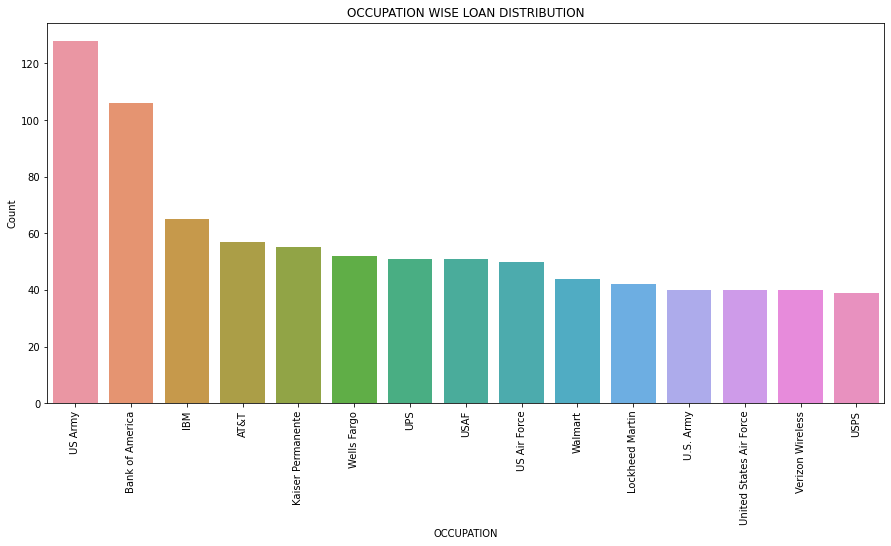

In [34]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
plt.xlabel('OCCUPATION')
plt.ylabel('COUNT')
plt.title('OCCUPATION WISE LOAN DISTRIBUTION')
ax = sb.barplot(x = occupation['index'],y = occupation[0])
ax.set(xlabel = 'OCCUPATION',ylabel = 'Count')

In [35]:
t = loan_charged_off['emp_title'].value_counts().to_dict()

In [36]:
t = pd.DataFrame().from_dict(t,orient = 'index')

In [37]:
t.reset_index(inplace =True)

In [38]:
t.sort_values(by = 0,ascending = False,inplace =True)

In [39]:
t = t.head(15)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'OCCUPATION')]

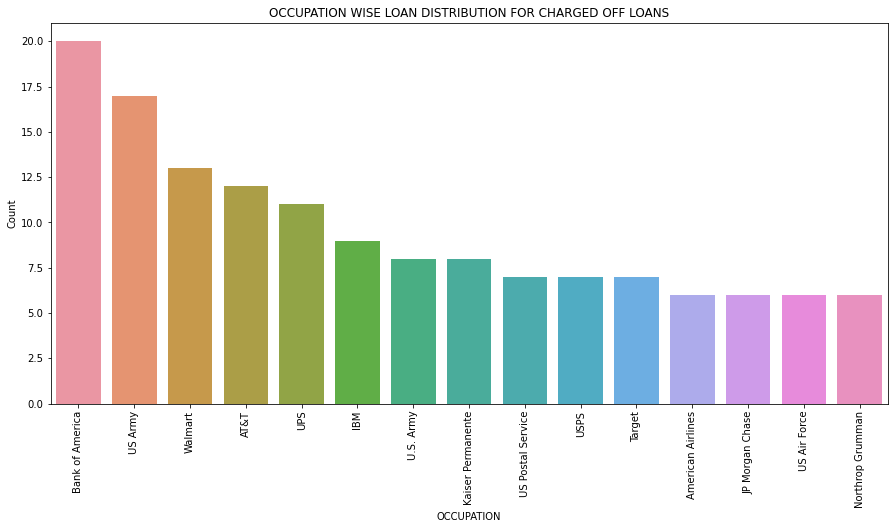

In [40]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
plt.xlabel('OCCUPATION')
plt.ylabel('COUNT')
plt.title('OCCUPATION WISE LOAN DISTRIBUTION FOR CHARGED OFF LOANS')
ax = sb.barplot(x = t['index'],y = t[0])
ax.set(xlabel = 'OCCUPATION',ylabel = 'Count')

## FROM THE ABOVE TWO GRAPHS IT IS CLEARLY VISIBLE THAT THOUGH BANK OF AMERICA AND US ARMY ARE THE ONE THAT TAKE MOST OF THE LOANS BUT AT THE SAME TIME BANK OF AMERICA HAS MOST NO> OF CHARGED OFF LOANS

# GRADE ANALYSIS OVER LOAN DISTRIBUTION

Text(0.5, 1.0, 'GRADE WISE LOAN DISTRIBUTION ANALYSIS')

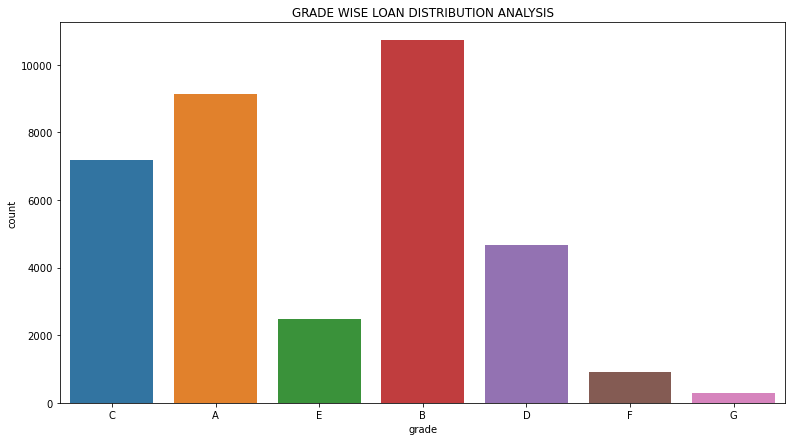

In [41]:
plt.figure(figsize = (13,7))
sb.countplot(loans_df.grade)
plt.title('GRADE WISE LOAN DISTRIBUTION ANALYSIS')

## MOST OF THE LOANS ARE TAKEN BY THE PEOPLE BELONGIGN TO A B & C GRADE

Text(0.5, 1.0, 'GRADE WISE CHARGED OFF LOAN ANALYSIS')

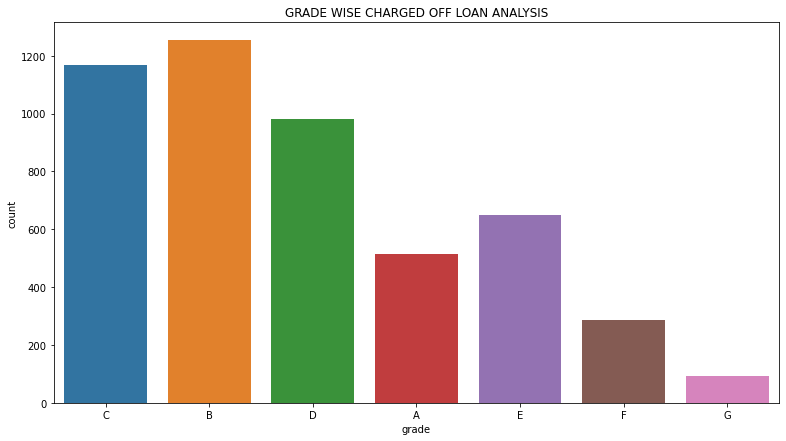

In [42]:
plt.figure(figsize = (13,7))
sb.countplot(loan_charged_off.grade)
plt.title('GRADE WISE CHARGED OFF LOAN ANALYSIS')

## IT CAN BE INFERRED FROM THE ABOVE GRAPFH THAT B, C & D GRADE ARE MOST LIKELY THAT THEIR LOAN IS CHARGED OFF

In [43]:
purpose  = loans_df['purpose'].value_counts().to_dict()
purpose = pd.DataFrame().from_dict(purpose,orient = 'index')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'PURPOSE OF LOAN')]

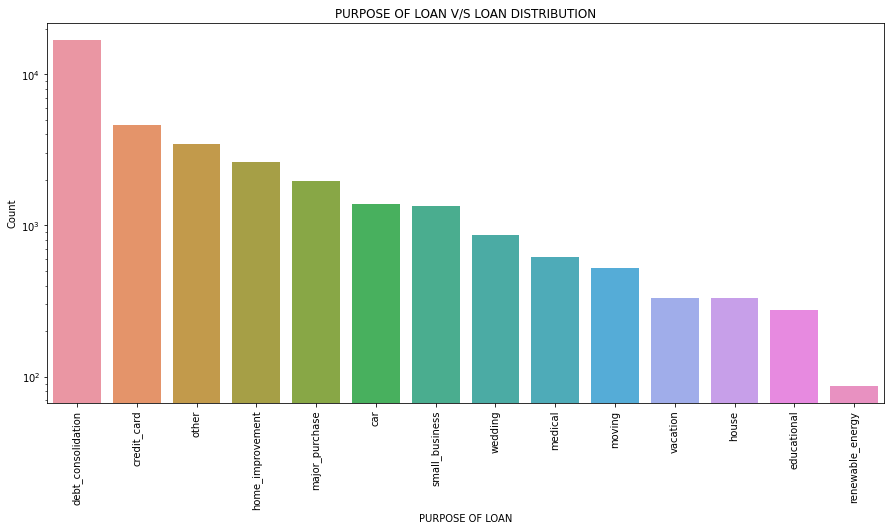

In [44]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
plt.yscale('log')
plt.title('PURPOSE OF LOAN V/S LOAN DISTRIBUTION')
ax = sb.barplot(x = purpose.index,y = purpose[0])
ax.set(xlabel = 'PURPOSE OF LOAN',ylabel = 'Count')

## MOST OF THE LOANS ARE TAKEN FOR DEBT_CONSOLIDATION, CREDIT CARD ETC

In [45]:
purpose  = loan_charged_off['purpose'].value_counts().to_dict()
purpose = pd.DataFrame().from_dict(purpose,orient = 'index')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'PURPOSE OF LOAN')]

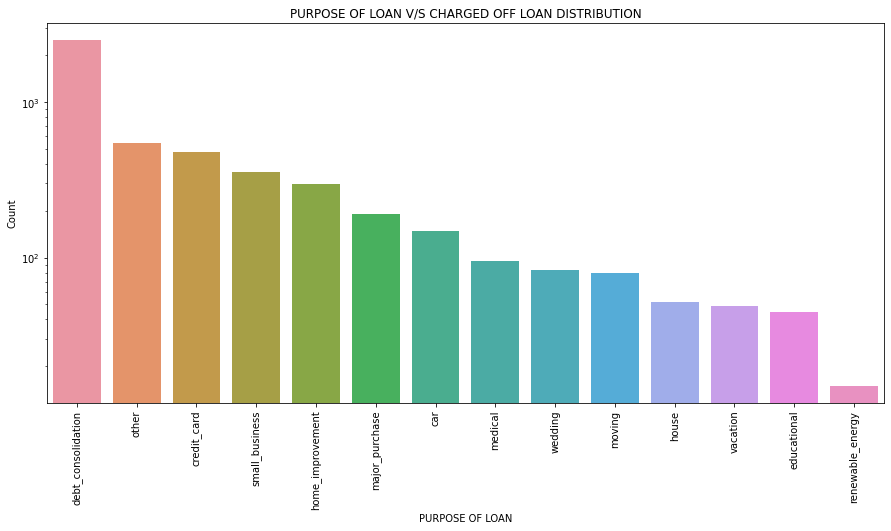

In [46]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
plt.yscale('log')
plt.title('PURPOSE OF LOAN V/S CHARGED OFF LOAN DISTRIBUTION')
ax = sb.barplot(x = purpose.index,y = purpose[0])
ax.set(xlabel = 'PURPOSE OF LOAN',ylabel = 'Count')

## MOST OF THE CHARGED OFF LOANS ARE TAKEN FOR DEBT_CONSOLIDATION, OTHER, CREDIT CARD ETC

In [47]:
loans_df.annual_inc.describe()

count    3.536500e+04
mean     6.909774e+04
std      6.396843e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

# let us map our annual income column such that minimum to 25% income is 0 25% to 50% is 1 and rest is 2

In [48]:
def mapping(y):
    if np.min(y)<= y <= 4.150000e+04 :
        return 0
    elif 4.150000e+04 < y <= 6.000000e+04:
        return 1
    else:
        return 2

In [53]:
loans_df['annual_inc_mapped'] = loans_df['annual_inc'].apply(mapping)

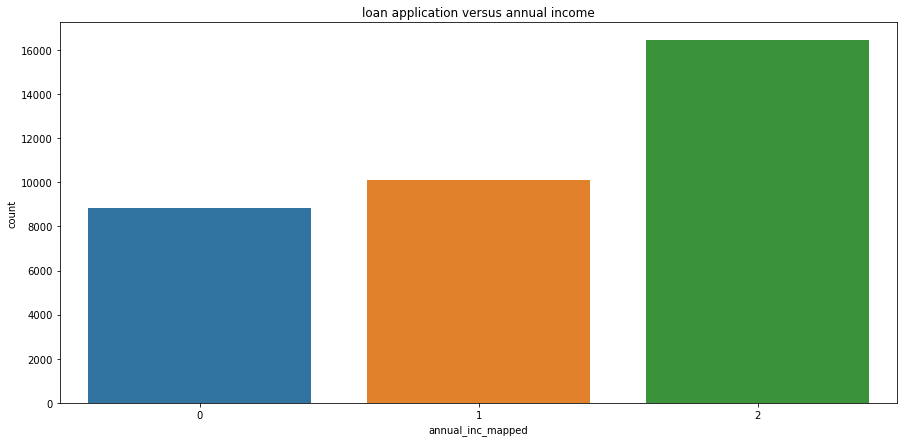

In [55]:
plt.figure(figsize = (15,7))
plt.title('loan application versus annual income')
sb.countplot(loans_df['annual_inc_mapped'])

## people with HIGH ANNUAL INCOME tend to apply more for loan

In [56]:
loan_charged_off['annual_inc_mapped'] = loan_charged_off['annual_inc'].apply(mapping)

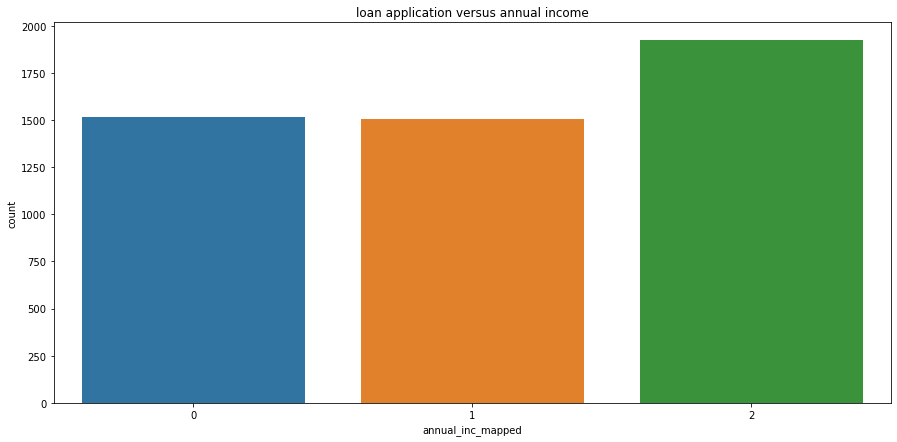

In [57]:
plt.figure(figsize = (15,7))
plt.title('loan application versus annual income')
sb.countplot(loan_charged_off['annual_inc_mapped'])

## people with HIGH ANNUAL income have more CHARGED OFF loans

# Let us map the dti column as min to 25% 0 , 25% to 50% as 1 and rest as 2 

In [59]:
def new_mapping(y):
    if np.min(y)<= y <= 8.320000 :
        return 0
    elif 8.320000 < y <= 13.500000:
        return 1
    else:
        return 2

In [62]:
loans_df['dti_mapped'] = loans_df['dti'].apply(new_mapping)

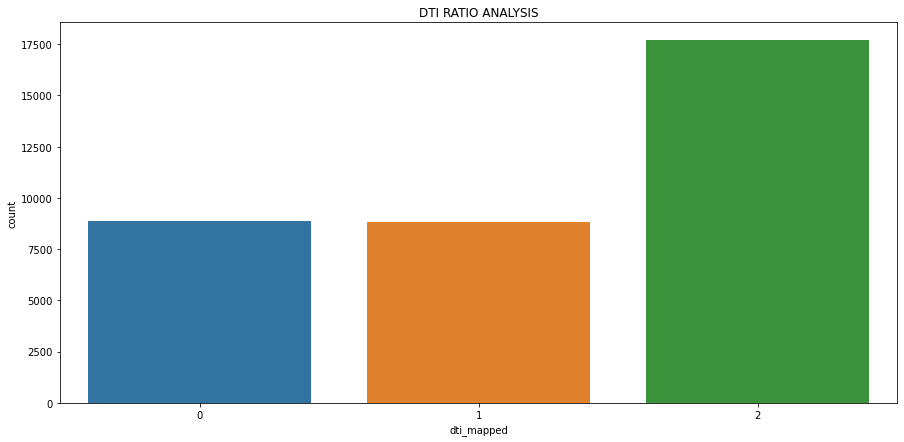

In [64]:
plt.figure(figsize = (15,7))
plt.title('DTI RATIO ANALYSIS')
sb.countplot(loans_df['dti_mapped'])

## People with high dti ratio take more loans

In [65]:
loan_charged_off['dti_mapped'] = loan_charged_off['dti'].apply(new_mapping)

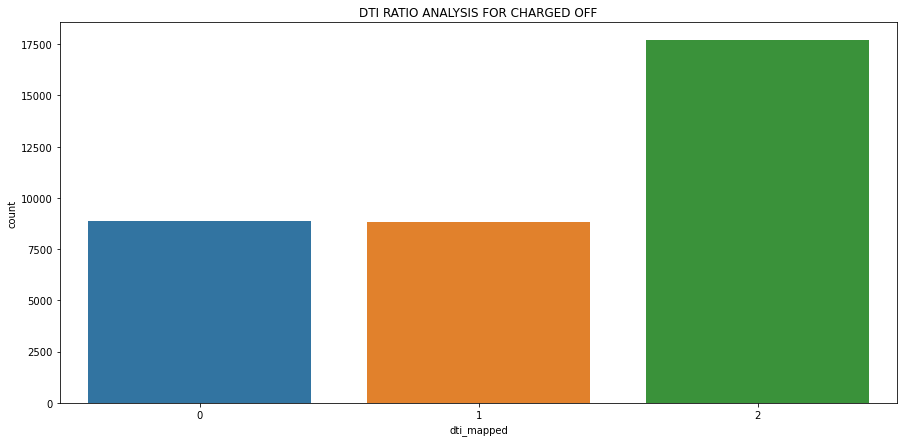

In [69]:
plt.figure(figsize = (15,7))
plt.title('DTI RATIO ANALYSIS FOR CHARGED OFF')
sb.countplot(loans_df['dti_mapped'])

## the no. of charged off loans are high for high dti ratio category

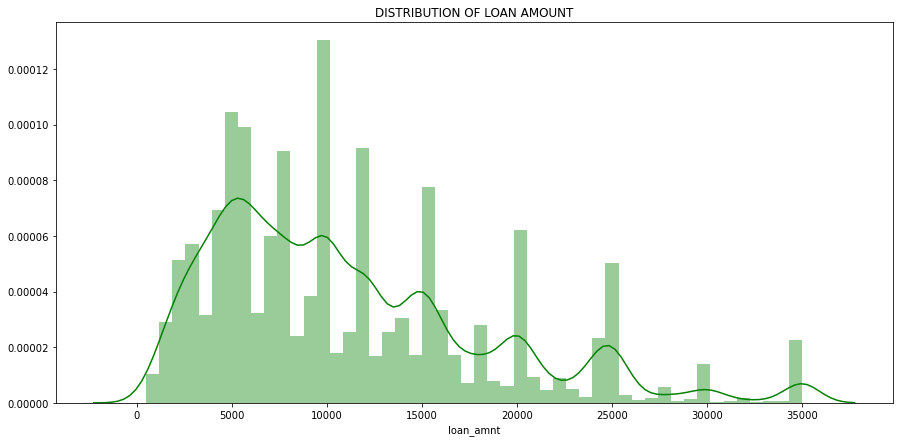

In [76]:
plt.figure(figsize = (15,7))
plt.title('DISTRIBUTION OF LOAN AMOUNT')
sb.distplot(loans_df.loan_amnt,color = 'g')

## the graph is right skewed which means that the high loan amounts are less as compared to small loan amounts

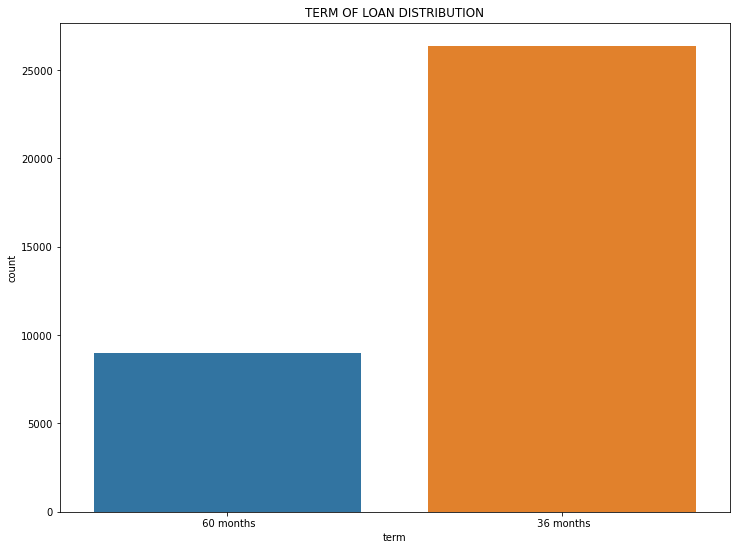

In [88]:
plt.figure(figsize = (12,9))
plt.title('TERM OF LOAN DISTRIBUTION')
sb.countplot(loans_df['term'])

## Short term loans are more popular than long term loans

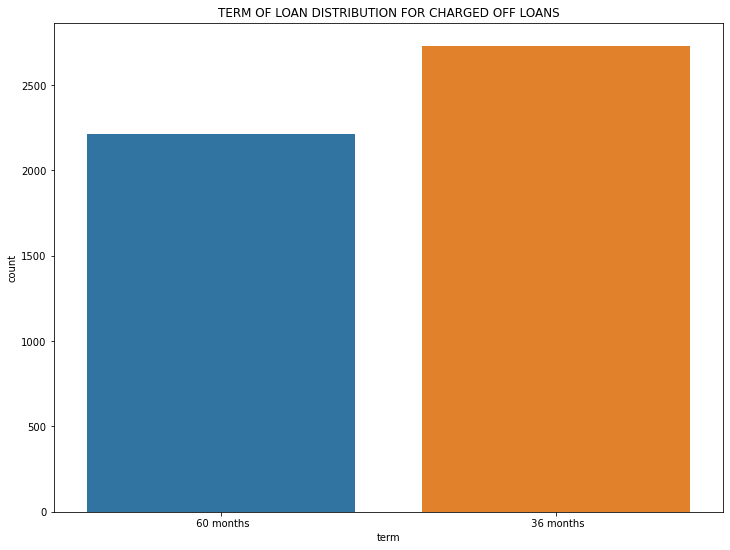

In [90]:
plt.figure(figsize = (12,9))
plt.title('TERM OF LOAN DISTRIBUTION FOR CHARGED OFF LOANS')
sb.countplot(loan_charged_off['term'])

## Short term loans are more likely to be charged off as compared to long term loans

# Thus on the basis of various metrics,analysis and plots we have made clear the conditions for loans that are charged off as they are the biggest threat to the company as well all the conditions whic are favourable for loans